Evaluating Naive Bayes:
              precision    recall  f1-score   support

       False       0.58      0.35      0.44       236
        True       0.58      0.78      0.67       275

    accuracy                           0.58       511
   macro avg       0.58      0.56      0.55       511
weighted avg       0.58      0.58      0.56       511

Evaluating Logistic Regression:
              precision    recall  f1-score   support

       False       0.58      0.42      0.49       236
        True       0.60      0.73      0.66       275

    accuracy                           0.59       511
   macro avg       0.59      0.58      0.57       511
weighted avg       0.59      0.59      0.58       511

Evaluating Random Forest:
              precision    recall  f1-score   support

       False       0.56      0.36      0.44       236
        True       0.58      0.75      0.66       275

    accuracy                           0.57       511
   macro avg       0.57      0.56      0.55   

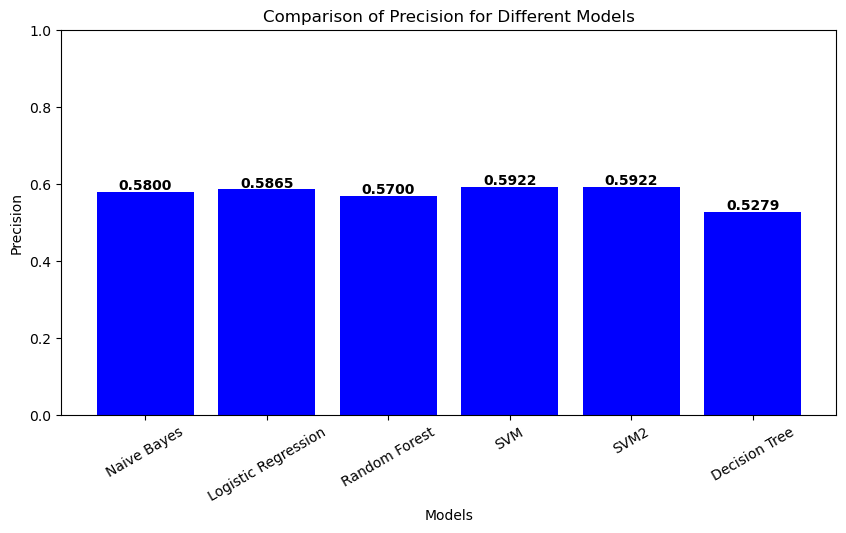

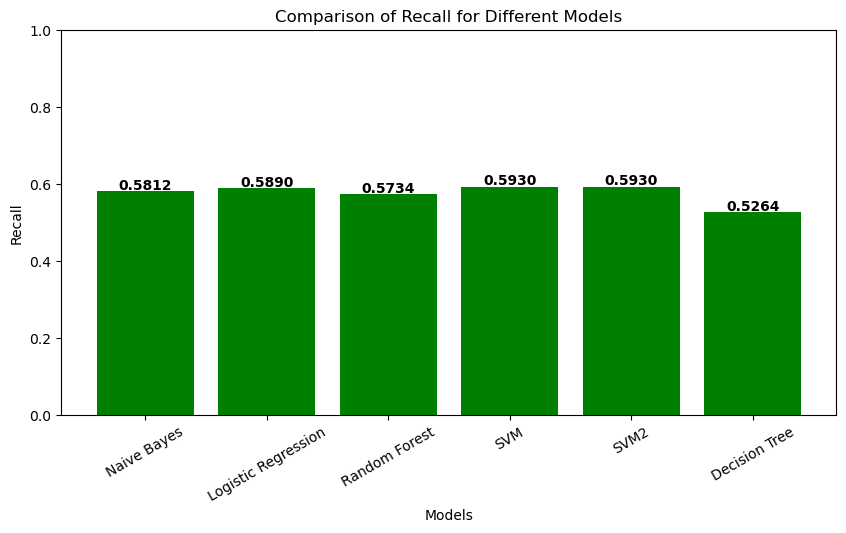

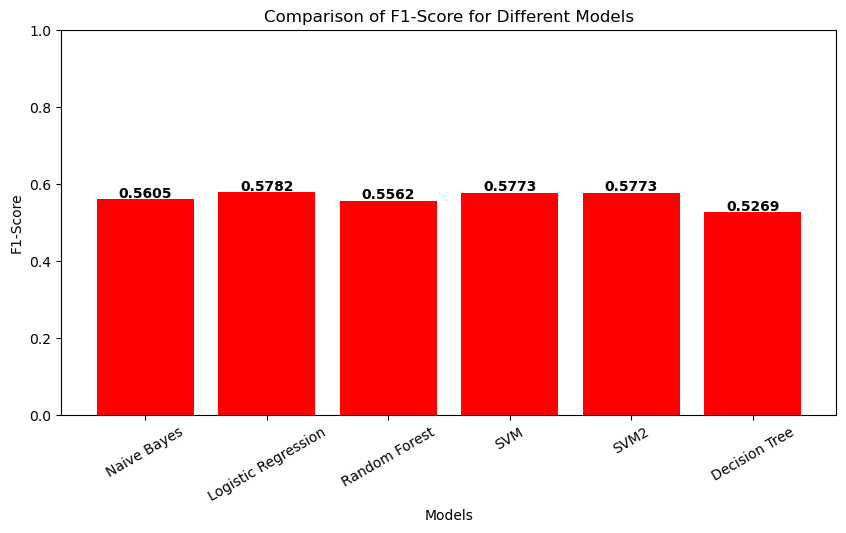

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

# Load dataset
df = pd.read_csv("../data/test.csv")  # Update path as needed

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Statement'])
y = df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "SVM2" : SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier()
}

# Store evaluation metrics
metrics = {"Model": [], "Precision": [], "Recall": [], "F1-Score": []}

loaded_models = {}
for name in models.keys():
    with open(f"../models/{name.replace(' ', '_').lower()}.pkl", "rb") as f:
        loaded_models[name] = pickle.load(f)
    
    y_pred = loaded_models[name].predict(X_test)
    # Convert classification report to dictionary and round values to 4 decimal places
    # Convert classification report to dictionary and round values to 4 decimal places
    report = classification_report(y_test, y_pred, output_dict=True)

    # Ensure only dictionaries are processed with .items()
    report = {
        k: {metric: round(v, 4) for metric, v in values.items()} if isinstance(values, dict) else round(values, 4)
        for k, values in report.items()
}
    # Extract weighted avg metrics
    metrics["Model"].append(name)
    metrics["Precision"].append(round(report["weighted avg"]["precision"], 4))
    metrics["Recall"].append(round(report["weighted avg"]["recall"], 4))
    metrics["F1-Score"].append(round(report["weighted avg"]["f1-score"], 4))

    print(f"Evaluating {name}:")
    print(classification_report(y_test, y_pred))

# Convert to DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

# Define plot function
def plot_metric(metric_name, color):
    plt.figure(figsize=(10, 5))
    plt.bar(metrics_df["Model"], metrics_df[metric_name], color=color)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"Comparison of {metric_name} for Different Models")
    plt.xticks(rotation=30)

    # Add value labels on top of bars
    for i, value in enumerate(metrics_df[metric_name]):
        plt.text(i, value + 0.005, f"{value:.4f}", ha="center", fontsize=10, fontweight="bold")

    plt.ylim(0, 1)  # Ensuring all bars fit in the range 0-1
    plt.show()

# Generate separate bar charts
plot_metric("Precision", "blue")
plot_metric("Recall", "green")
plot_metric("F1-Score", "red")